## Credit Project

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
import urllib.request
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
filename = "german.csv"
urllib.request.urlretrieve(url, filename)


('german.csv', <http.client.HTTPMessage at 0x26a16ac9c10>)

### Data backround
The data we are working with is the German Credit dataset, which contains information about credit applicants in Germany. The dataset includes 20 categorical and numeric features such as the applicant's age, credit history, employment status, and purpose of the loan. The dataset was originally sourced from the UCI Machine Learning Repository and has been preprocessed into a CSV file format. We downloaded the dataset from the repository and saved it as "german.csv".

In [3]:
# Set the display options for pandas dataframes
pd.set_option('display.max_columns', None) # Display all columns
pd.set_option('display.max_rows', None) # Display all rows
pd.set_option('display.width', None) # Automatically adjust the column width
pd.set_option('display.max_colwidth', None) # Display full contents of each column

# Load the dataset from the "german.csv" file
data = pd.read_csv('german.csv', header=None)

# Display the first few rows of the DataFrame
display(data.head())


,0
0,A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1
1,A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 22 A143 A152 1 A173 1 A191 A201 2
2,A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 49 A143 A152 1 A172 2 A191 A201 1
3,A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 45 A143 A153 1 A173 2 A191 A201 1
4,A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 53 A143 A153 2 A173 2 A191 A201 2


### Notes on initial loading:

The above code sets the display options for pandas dataframes, loads the German credit dataset from a file called "german.csv", and displays the first few rows of the dataframe. However, since the data was loaded without column names, we will need to assign column names to the dataframe later in the analysis. This is done below.

In [4]:
import pandas as pd

# Define the column names
column_names = [
    "checking_account_status",
    "duration",
    "credit_history",
    "purpose",
    "credit_amount",
    "savings_account_status",
    "employment",
    "installment_rate",
    "personal_status",
    "other_debtors",
    "residence_since",
    "property",
    "age",
    "other_installment_plans",
    "housing",
    "number_credits",
    "job",
    "dependents",
    "telephone",
    "foreign_worker",
    "class"
]

# Load the dataset from the "german.csv" file and set the column names
data = pd.read_csv('german.csv', sep=' ', header=None, names=column_names)



# Display the first few rows of the DataFrame
data.head()


,checking_account_status,duration,credit_history,purpose,credit_amount,savings_account_status,employment,installment_rate,personal_status,other_debtors,residence_since,property,age,other_installment_plans,housing,number_credits,job,dependents,telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


### Explaining the header

The header represents the column names of the dataset. Here's how to read the column names:


- **checking_account_status**: Status of the existing checking account


- **duration**: Duration in months


- **credit_history**: Credit history, where A30 means no credit taken/all credits paid back duly, A31 means all credits at this bank paid back duly, A32 means existing credits paid back duly till now, A33 means delay in paying off in the past, A34 means critical account/other credits existing (not at this bank)


- **purpose**: Purpose of the credit, where A40 means car (new), A41 means car (used), A42 means furniture/equipment, A43 means radio/television, A44 means domestic appliances, A45 means repairs, A46 means education, A47 means vacation, A48 means retraining, A49 means business, A410 means others


- **credit_amount**: Credit amount


- **savings_account_status**: Status of savings account/bonds, where A61 means less than 100 DM, A62 means 100 <= ... < 500 DM, A63 means 500 <= ... < 1000 DM, A64 means 1000 <= ... < 5000 DM, A65 means >= 5000 DM
- employment: Present employment since, where A71 means unemployed, A72 means < 1 year, A73 means 1 <= ... < 4 years, A74 means 4 <= ... < 7 years, A75 means >= 7 years


- **installment_rate**: Installment rate in percentage of disposable income


- **personal_status**: Personal status and sex, where A91 means male:divorced/separated, A92 means female:divorced/separated/married, A93 means male:single, A94 means male:married/widowed, A95 means female:single


- **other_debtors**: Other debtors/guarantors, where A101 means none, A102 means co-applicant, A103 means guarantor


- **residence_since**: Present residence since (in years)


- **property**: Property, where A121 means real estate, A122 means if not A121 : building society savings agreement/life insurance, A123 means if not A121/A122 : car or other, A124 means unknown/no property


- **age**: Age in years


- **other_installment_plans**: Other installment plans, where A141 means bank, A142 means stores, A143 means none


- **housing**: Housing, where A151 means rent, A152 means own, A153 means for free


- **number_credits**: Number of existing credits at this bank


- **job**: Job, where A171 means unemployed/unskilled - non-resident, A172 means unskilled - resident, A173 means skilled employee/official, A174 means management/self-employed/highly qualified employee/officer
- dependents: Number of people being liable to provide maintenance for


- **telephone**: Telephone, where A191 means none, A192 means yes, registered under the customers name


- **foreign_worker**: Foreign worker, where A201 means yes, A202 means no


- **class**: Credit classification, where 1 means good, and 0 means bad


## Visualizing and understanding the data

Two types of visualizations are created: pair plots for numerical features and bar plots for categorical features.

- **Pair plots for numerical features**: These plots display pairwise scatter plots between numerical features such as "duration", "credit_amount", "installment_rate", "residence_since", "age", "number_credits", and "dependents". By examining the pair plots, you can identify any patterns or relationships between the numerical features. This information can help you understand feature interactions and decide whether any feature engineering is required.

- **Bar plots for categorical features**: These plots display the distribution of categories within each categorical feature, such as "checking_account_status", "credit_history", "purpose", "savings_account_status", "employment", and others. By examining the bar plots, you can identify imbalances in the categories that might affect your model's performance. If any imbalances are detected, you might need to address them using techniques like oversampling, undersampling, or applying different evaluation metrics.

By visualizing and understanding the data, we hope to gain insights into the relationships between features and the distribution of categories, which will inform our decisions about data preprocessing, feature selection, and model development.

### Visualization 1 code

This code block loads the original dataset with categorical features into a DataFrame called data. Then, it creates a list of numerical features and generates a pair plot using Seaborn's pairplot() function. The pair plot displays scatter plots for each pair of numerical features in the dataset. Finally, plt.show() is called to display the pair plot.

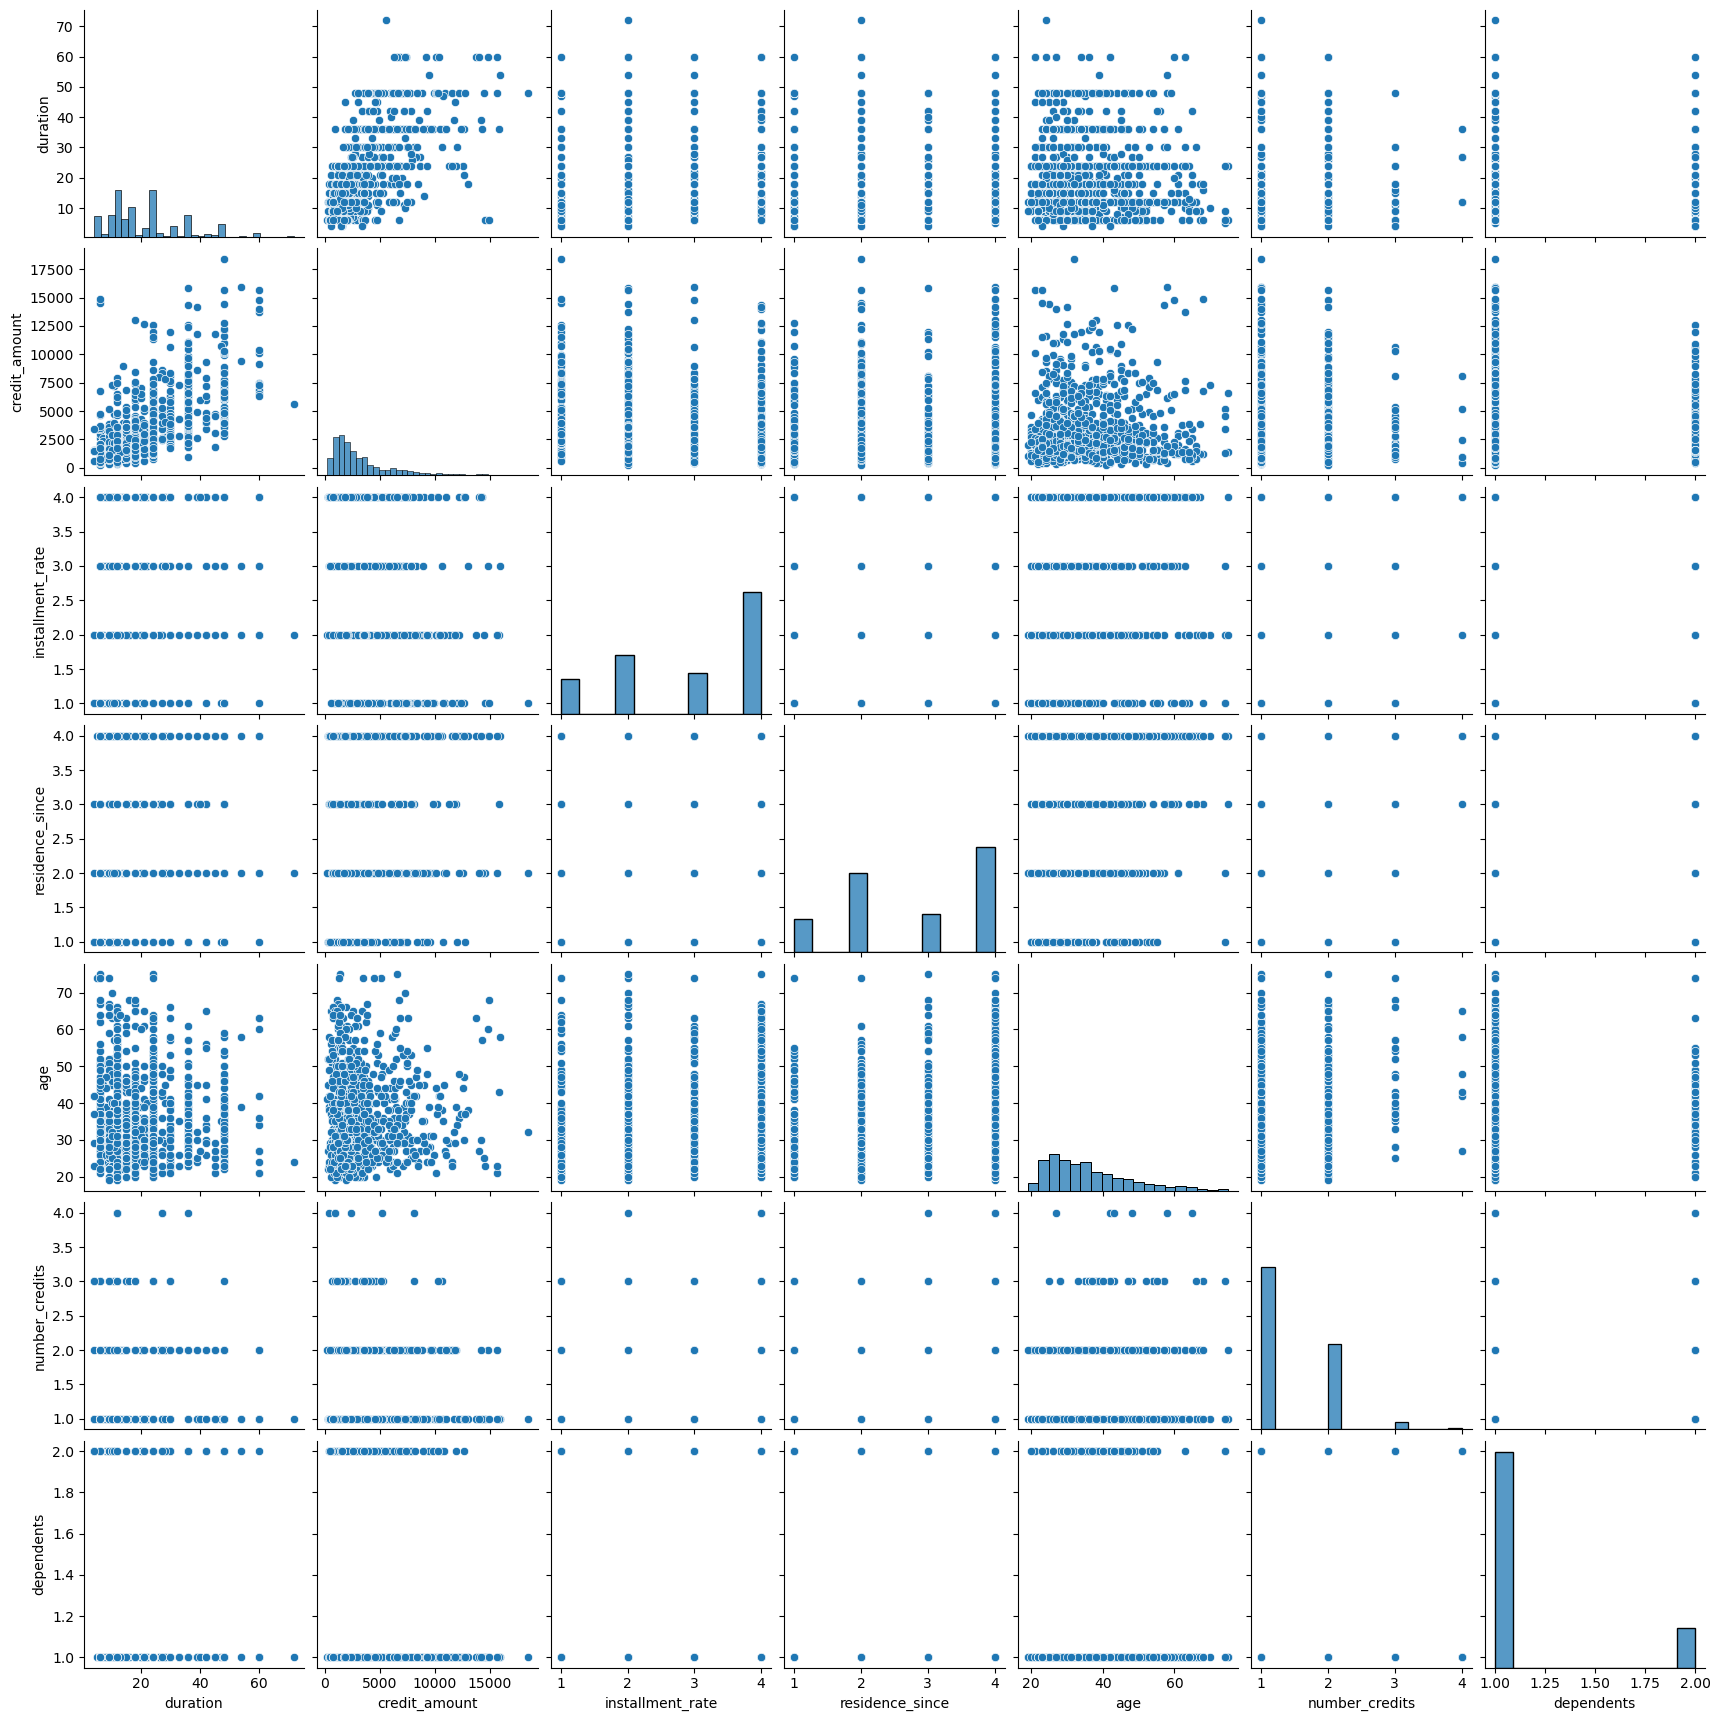

In [5]:
# Load the original dataset with categorical features
data = pd.read_csv('german.csv', sep=' ', header=None, names=column_names)

# Numerical features pair plot
numerical_features = ["duration", "credit_amount", "installment_rate", "residence_since", "age", "number_credits", "dependents"]
sns.pairplot(data[numerical_features])
plt.show()



## Commentary on visual 1

The pair plot shows pairwise relationships between the selected numerical features of the dataset, namely duration, credit_amount, installment_rate, residence_since, age, number_credits, and dependents. The plots along the diagonal represent the distribution of each feature, while the scatter plots in the other cells represent the relationship between two features.

Looking at the scatter plots, there does not appear to be any strong correlation between any of the features. However, there seem to be some interesting patterns, such as an increasing trend between credit_amount and duration, as well as age and credit_amount. Additionally, it looks like there may be some outliers in the data, particularly in the credit_amount feature.

### Visualization 2 code

This code block creates a list of categorical features. Then, it iterates through the list and generates a bar plot for each feature using Seaborn's countplot() function. The bar plot displays the distribution of each category within a feature. The code sets the figure size, rotates the x-axis labels, and adds a title to each plot. Finally, plt.show() is called to display the bar plot for each categorical feature.

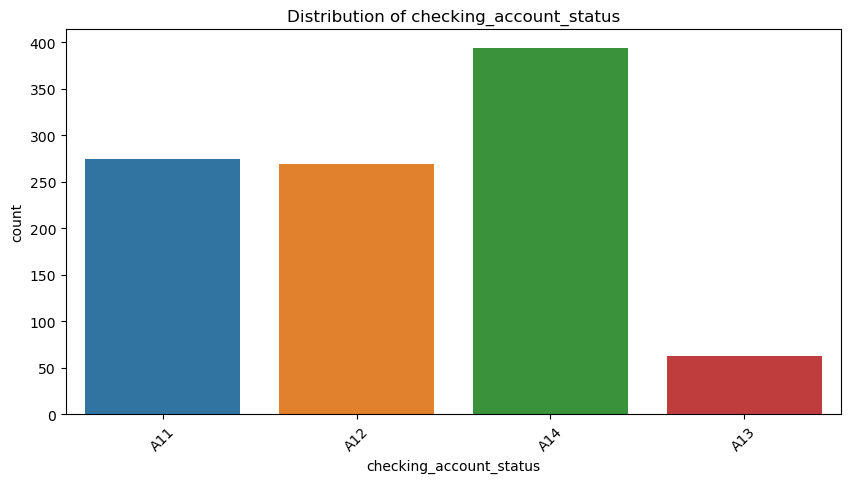

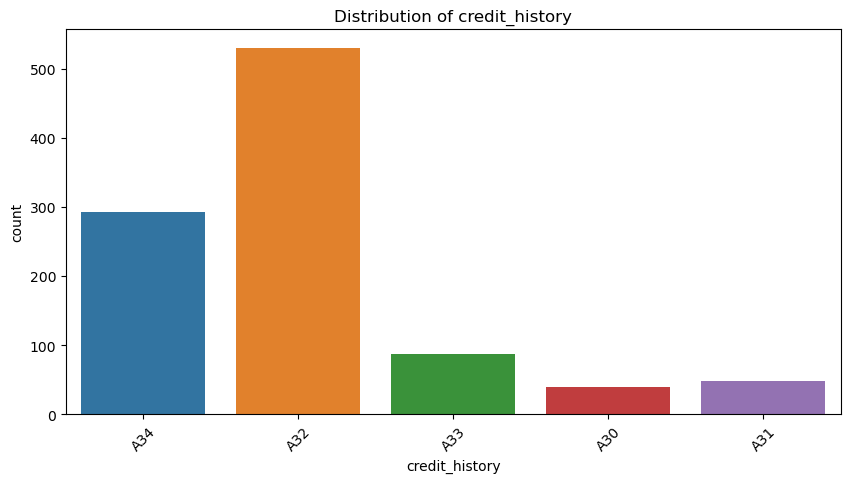

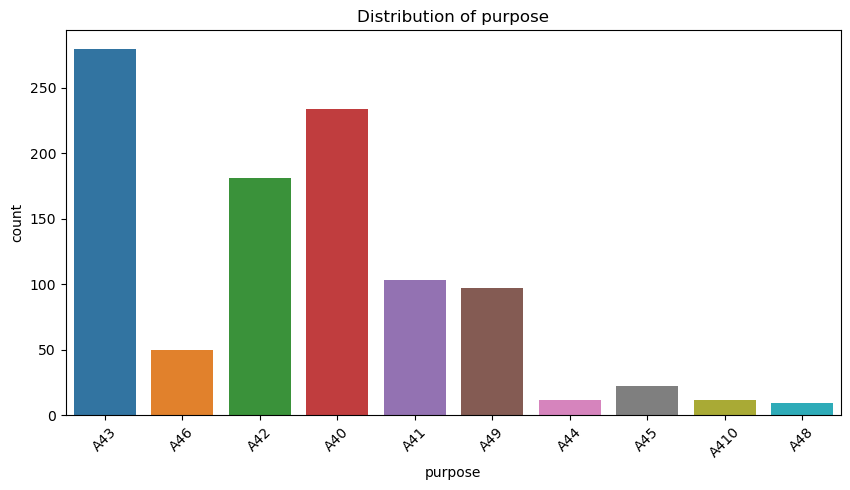

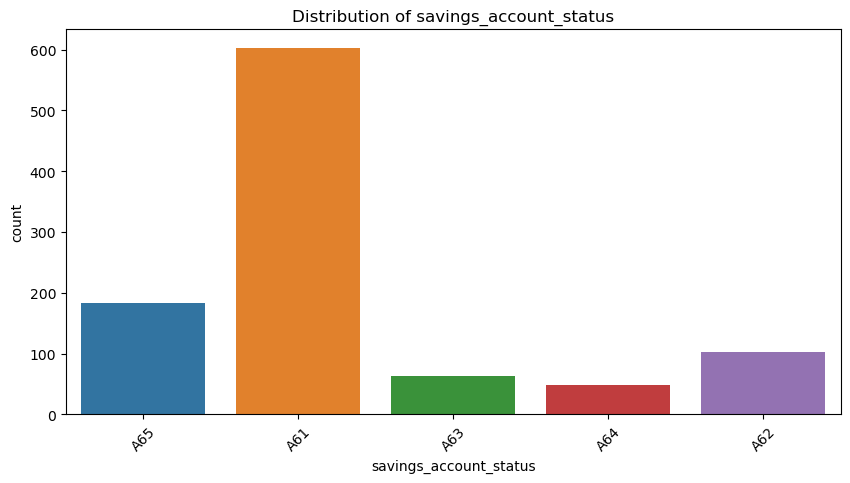

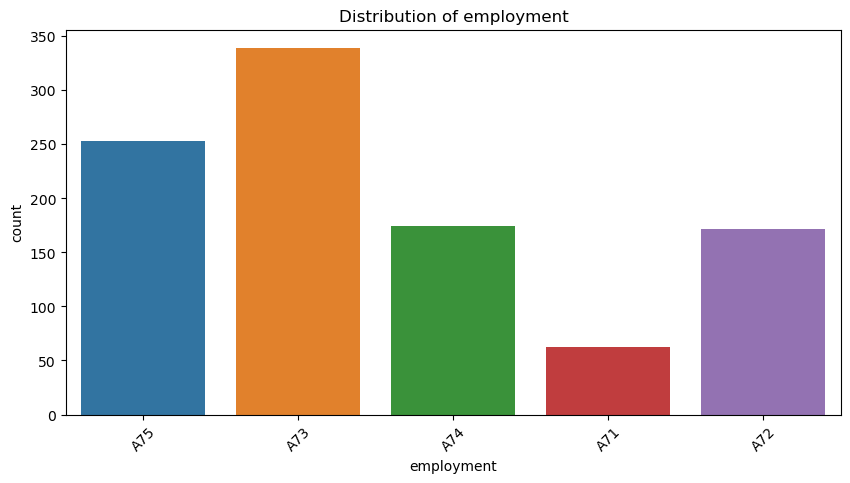

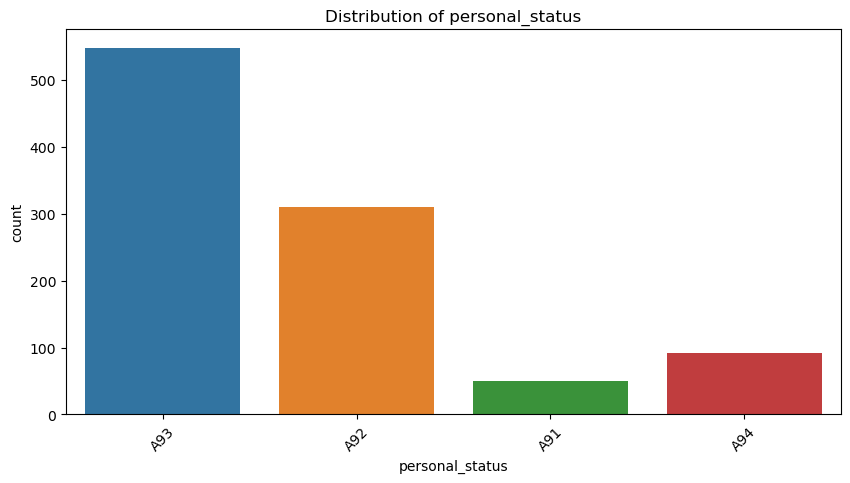

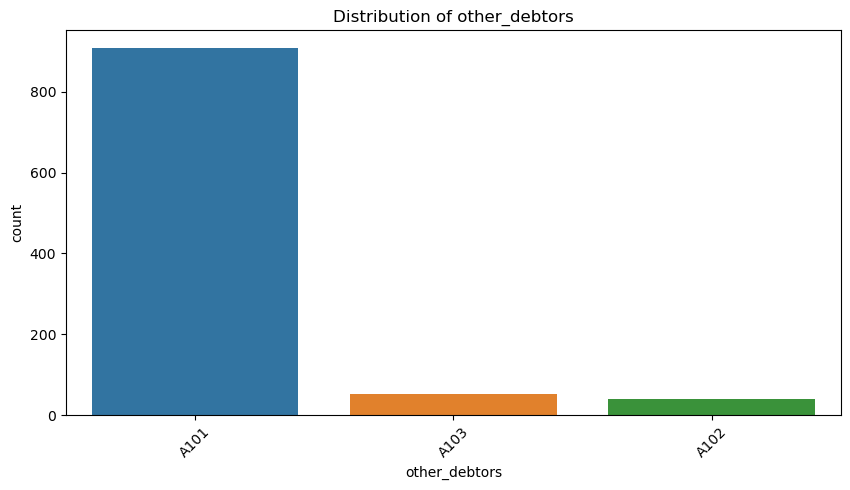

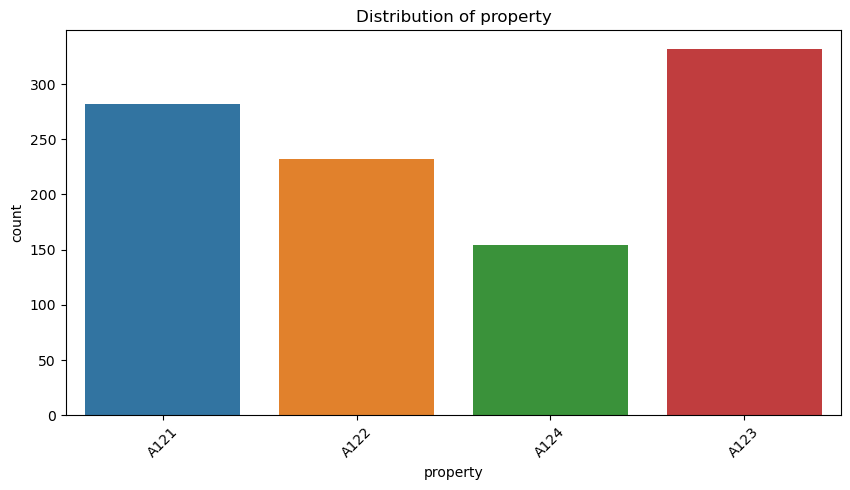

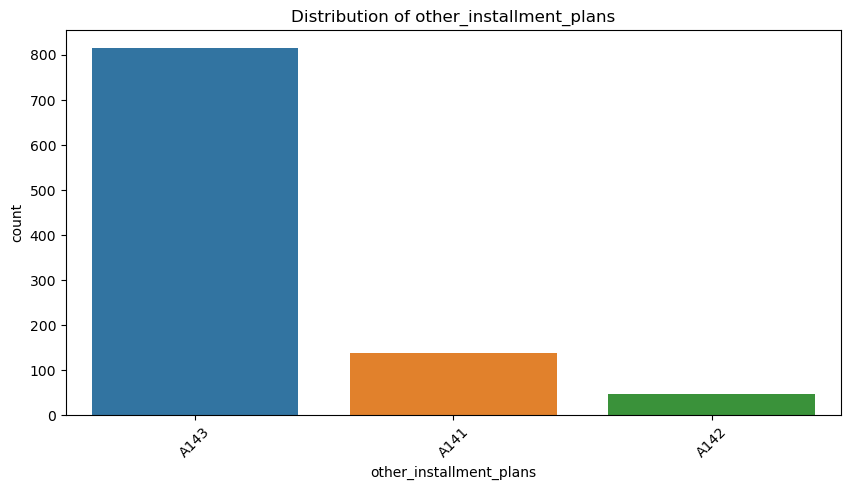

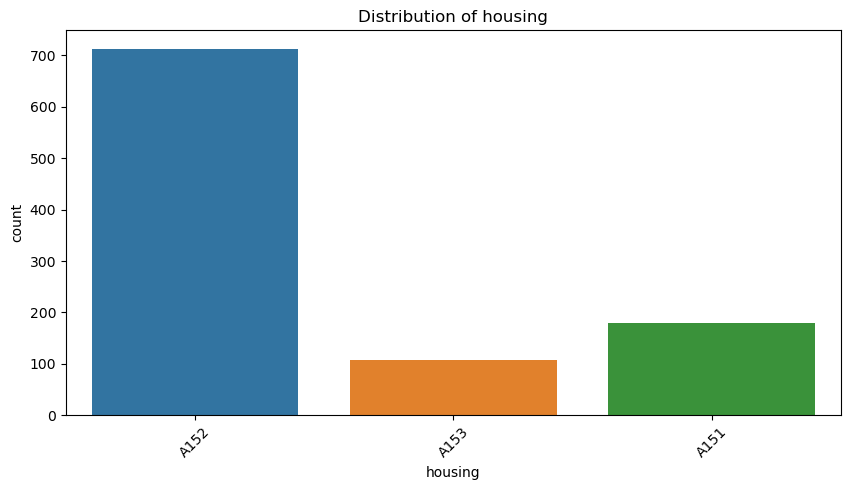

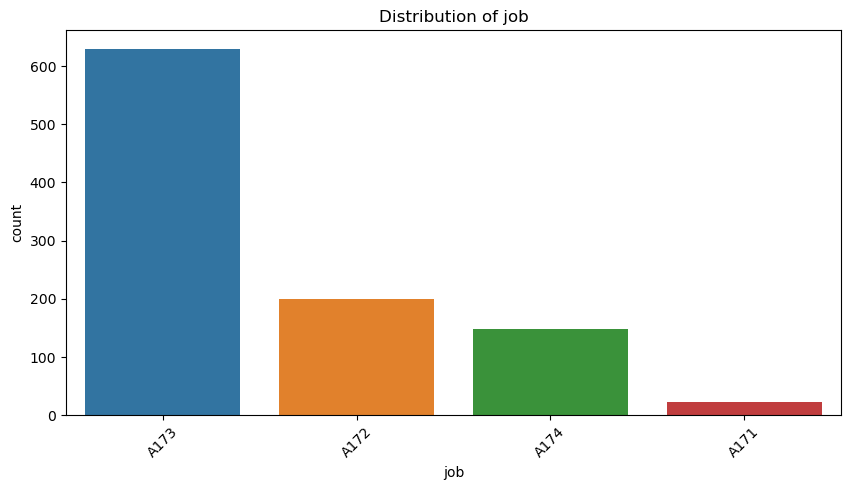

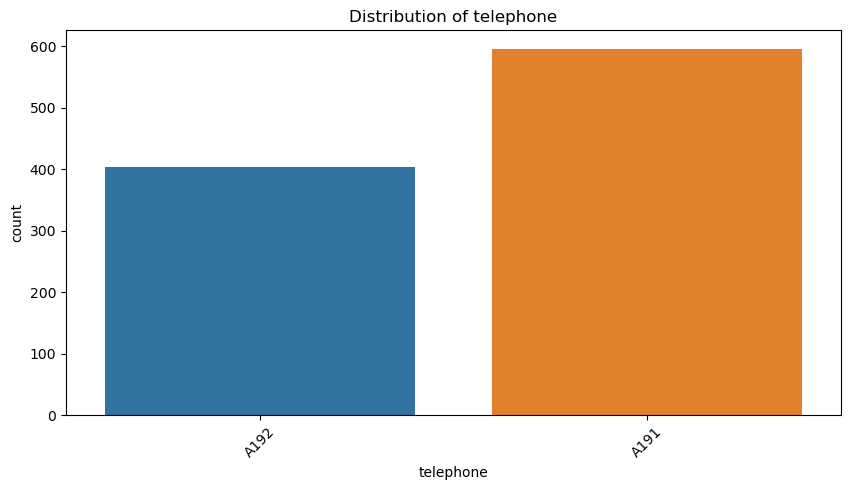

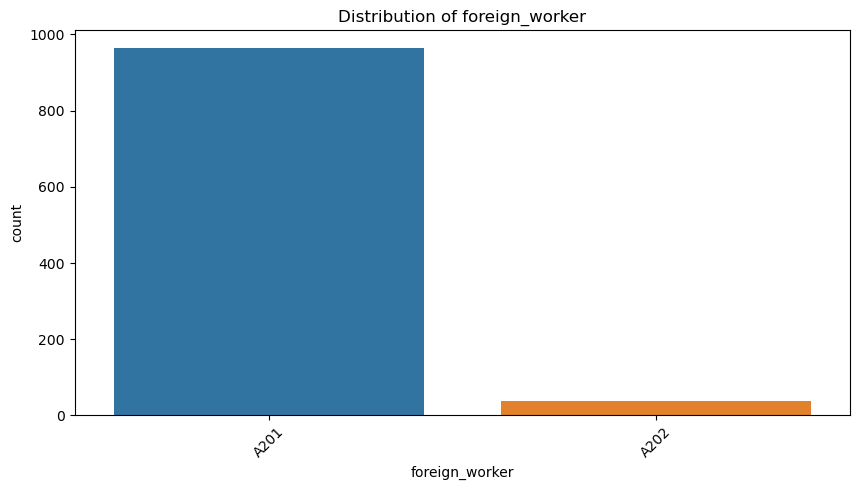

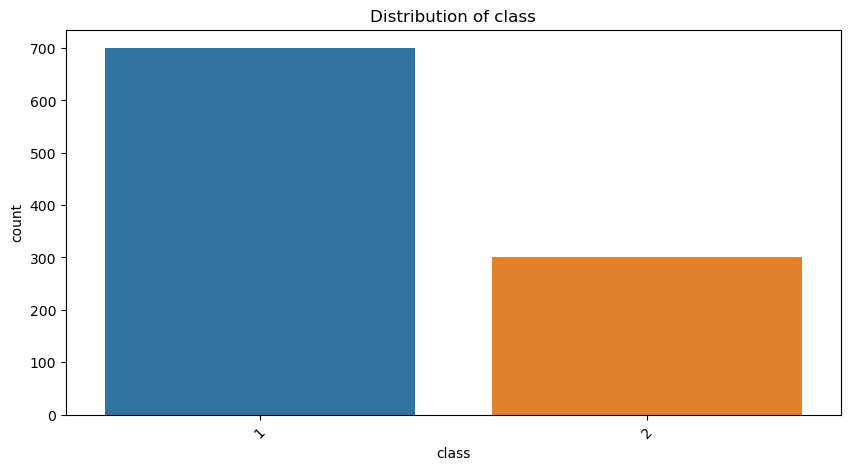

In [6]:
# Bar plots for categorical features
categorical_features = [
    "checking_account_status",
    "credit_history",
    "purpose",
    "savings_account_status",
    "employment",
    "personal_status",
    "other_debtors",
    "property",
    "other_installment_plans",
    "housing",
    "job",
    "telephone",
    "foreign_worker",
    "class"
]

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=feature)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {feature}")
    plt.show()

## Commentary on visual 2

Looking at the plots, we can make some observations:

- Most of the customers in the dataset have a "checking_account_status" of A11 (no checking account) or A14 (>= 200 DM).


- The majority of customers have a "credit_history" of A32 (existing credits paid back duly) or A34 (critical account/other credits existing).


- The most common "purpose" for taking credit is A43 (radio/television), followed by A40 (car - new).


- Most customers have a "savings_account_status" of A61 (less than 100 DM), followed by A65 (>= 5000 DM).


- The majority of customers have been employed for at least 1 year, with A73 (1 <= ... < 4 years) being the most common "employment" status.


- Most customers have a "personal_status" of A93 (male, single), followed by A92 (female:divorced/separated/married).


- Most customers have "other_debtors" status of A101 (none), followed by A102 (co-applicant).


- The most common "property" status is A123 (if not A121/A122 : car or other), followed by A121 (real estate).


- The majority of customers have no "other_installment_plans" (A143).


- Most customers have their own housing (A152).


- The most common "job" status is A173 (skilled employee/official).


- Most customers have no telephone (A191).


- Most customers are not foreign workers (A201).


- The target variable "class" has more instances of the value 1 (good credit) than 2 (bad credit).


## Data preprocess

In [7]:
# 1. Data preprocessing
# a. Check for missing values
print(data.isnull().sum())




checking_account_status    0
duration                   0
credit_history             0
purpose                    0
credit_amount              0
savings_account_status     0
employment                 0
installment_rate           0
personal_status            0
other_debtors              0
residence_since            0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
dependents                 0
telephone                  0
foreign_worker             0
class                      0
dtype: int64


In [8]:
# b. Encode categorical features
data = pd.get_dummies(data, columns=[
    "checking_account_status",
    "credit_history",
    "purpose",
    "savings_account_status",
    "employment",
    "personal_status",
    "other_debtors",
    "property",
    "other_installment_plans",
    "housing",
    "job",
    "telephone",
    "foreign_worker"
])



In [9]:
# c. Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = data.drop("class", axis=1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# d. Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Cross-validation with multiple classifiers

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score


# define the models
lr_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# define the number of folds for cross-validation
k = 5

# evaluate the models using k-fold cross-validation
lr_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=k, scoring='accuracy')
lr_precision = cross_val_score(lr_model, X_train_scaled, y_train, cv=k, scoring='precision')
lr_recall = cross_val_score(lr_model, X_train_scaled, y_train, cv=k, scoring='recall')
lr_f1 = cross_val_score(lr_model, X_train_scaled, y_train, cv=k, scoring='f1')

svm_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=k, scoring='accuracy')
svm_precision = cross_val_score(svm_model, X_train_scaled, y_train, cv=k, scoring='precision')
svm_recall = cross_val_score(svm_model, X_train_scaled, y_train, cv=k, scoring='recall')
svm_f1 = cross_val_score(svm_model, X_train_scaled, y_train, cv=k, scoring='f1')

dt_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=k, scoring='accuracy')
dt_precision = cross_val_score(dt_model, X_train_scaled, y_train, cv=k, scoring='precision')
dt_recall = cross_val_score(dt_model, X_train_scaled, y_train, cv=k, scoring='recall')
dt_f1 = cross_val_score(dt_model, X_train_scaled, y_train, cv=k, scoring='f1')

rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=k, scoring='accuracy')
rf_precision = cross_val_score(rf_model, X_train_scaled, y_train, cv=k, scoring='precision')
rf_recall = cross_val_score(rf_model, X_train_scaled, y_train, cv=k, scoring='recall')
rf_f1 = cross_val_score(rf_model, X_train_scaled, y_train, cv=k, scoring='f1')

# print the average performance scores for each model
print("Logistic Regression:")
print("Accuracy: ", lr_scores.mean())
print("Precision: ", lr_precision.mean())
print("Recall: ", lr_recall.mean())
print("F1 Score: ", lr_f1.mean())

print("\nSupport Vector Machine:")
print("Accuracy: ", svm_scores.mean())
print("Precision: ", svm_precision.mean())
print("Recall: ", svm_recall.mean())
print("F1 Score: ", svm_f1.mean())

print("\nDecision Tree:")
print("Accuracy: ", dt_scores.mean())
print("Precision: ", dt_precision.mean())
print("Recall: ", dt_recall.mean())
print("F1 Score: ", dt_f1.mean())

print("\nRandom Forest:")
print("Accuracy: ", rf_scores.mean())
print("Precision: ", rf_precision.mean())
print("Recall: ", rf_recall.mean())
print("F1 Score: ", rf_f1.mean())

Logistic Regression:
Accuracy:  0.74
Precision:  0.7887918935887669
Recall:  0.8587676962676962
F1 Score:  0.8219486200597144

Support Vector Machine:
Accuracy:  0.74375
Precision:  0.7622014197752047
Recall:  0.9212998712998713
F1 Score:  0.8341267422602903

Decision Tree:
Accuracy:  0.6712499999999999
Precision:  0.7619706595568665
Recall:  0.7710907335907335
F1 Score:  0.7661414976714798

Random Forest:
Accuracy:  0.7525
Precision:  0.7716759538002962
Recall:  0.9177123552123552
F1 Score:  0.8382948947754858


In [11]:
# print the average performance scores for each model
print("Logistic Regression:")
print("Accuracy: ", round(lr_scores.mean(), 4))
print("Precision: ", round(lr_precision.mean(), 4))
print("Recall: ", round(lr_recall.mean(), 4))
print("F1 Score: ", round(lr_f1.mean(), 4))

print("\nSupport Vector Machine:")
print("Accuracy: ", round(svm_scores.mean(), 4))
print("Precision: ", round(svm_precision.mean(), 4))
print("Recall: ", round(svm_recall.mean(), 4))
print("F1 Score: ", round(svm_f1.mean(), 4))

print("\nDecision Tree:")
print("Accuracy: ", round(dt_scores.mean(), 4))
print("Precision: ", round(dt_precision.mean(), 4))
print("Recall: ", round(dt_recall.mean(), 4))
print("F1 Score: ", round(dt_f1.mean(), 4))

print("\nRandom Forest:")
print("Accuracy: ", round(rf_scores.mean(), 4))
print("Precision: ", round(rf_precision.mean(), 4))
print("Recall: ", round(rf_recall.mean(), 4))
print("F1 Score: ", round(rf_f1.mean(),4))

Logistic Regression:
Accuracy:  0.74
Precision:  0.7888
Recall:  0.8588
F1 Score:  0.8219

Support Vector Machine:
Accuracy:  0.7438
Precision:  0.7622
Recall:  0.9213
F1 Score:  0.8341

Decision Tree:
Accuracy:  0.6712
Precision:  0.762
Recall:  0.7711
F1 Score:  0.7661

Random Forest:
Accuracy:  0.7525
Precision:  0.7717
Recall:  0.9177
F1 Score:  0.8383


### Comments on output

The above output tells us the average performance of each model over 5-fold cross-validation. Specifically, it shows the accuracy, precision, recall, and F1 score of each model.

The accuracy score measures how often the model predicted the correct label. The precision score measures the proportion of true positive predictions out of all positive predictions. The recall score measures the proportion of true positive predictions out of all actual positive instances. Finally, the F1 score is the harmonic mean of precision and recall, providing a balanced measure of model performance.

Comparing the performance scores of each model, we can see that the logistic regression and support vector machine models have the highest accuracy, precision, recall, and F1 scores. The decision tree model has the lowest scores among the four models. The random forest model has a slightly higher accuracy, precision, recall, and F1 score than the logistic regression and support vector machine models but not by a significant margin.

## Model training and evaluation with individual models on test set

In [12]:
# 1. Model development
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)


# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)



# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)



# c. Evaluate the model's performance on the testing set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

lr_accuracy, lr_precision, lr_recall, lr_f1 = evaluate_model(lr_model, X_test_scaled, y_test)
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(svm_model, X_test_scaled, y_test)

dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate_model(dt_model, X_test_scaled, y_test)
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_model, X_test_scaled, y_test)

print("Logistic Regression:")
print("Accuracy: ", lr_accuracy)
print("Precision: ", lr_precision)
print("Recall: ", lr_recall)
print("F1 Score: ", lr_f1)

print("\nSupport Vector Machine:")
print("Accuracy: ", svm_accuracy)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)
print("F1 Score: ", svm_f1)

print("\nDecision Tree:")
print("Accuracy: ", dt_accuracy)
print("Precision: ", dt_precision)
print("Recall: ", dt_recall)
print("F1 Score: ", dt_f1)

print("\nRandom Forest:")
print("Accuracy: ", rf_accuracy)
print("Precision: ", rf_precision)
print("Recall: ", rf_recall)
print("F1 Score: ", rf_f1)





Logistic Regression:
Accuracy:  0.8
Precision:  0.8389261744966443
Recall:  0.8865248226950354
F1 Score:  0.8620689655172412

Support Vector Machine:
Accuracy:  0.795
Precision:  0.8012048192771084
Recall:  0.9432624113475178
F1 Score:  0.8664495114006514

Decision Tree:
Accuracy:  0.7
Precision:  0.7832167832167832
Recall:  0.7943262411347518
F1 Score:  0.7887323943661974

Random Forest:
Accuracy:  0.795
Precision:  0.7976190476190477
Recall:  0.950354609929078
F1 Score:  0.8673139158576053


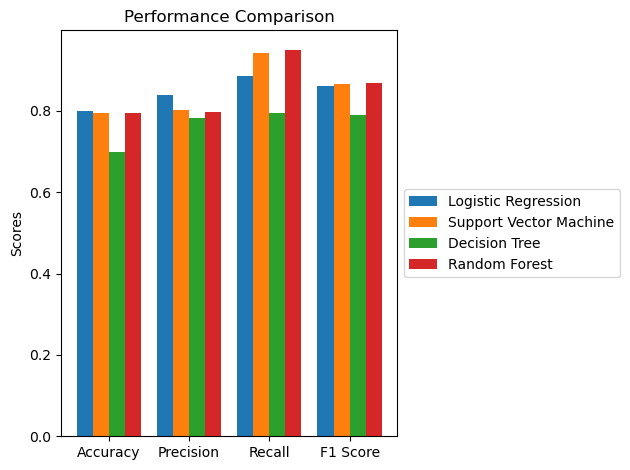

In [13]:
# Performance visualization: Bar plot
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
lr_metrics = [lr_accuracy, lr_precision, lr_recall, lr_f1]
svm_metrics = [svm_accuracy, svm_precision, svm_recall, svm_f1]
dt_metrics = [dt_accuracy, dt_precision, dt_recall, dt_f1]
rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1]

x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - (3 * width)/2, lr_metrics, width, label='Logistic Regression')
rects2 = ax.bar(x - width/2, svm_metrics, width, label='Support Vector Machine')
rects3 = ax.bar(x + width/2, dt_metrics, width, label='Decision Tree')
rects4 = ax.bar(x + (3 * width)/2, rf_metrics, width, label='Random Forest')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)


# Move legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()


In [14]:
## round results

print("Logistic Regression:")
print("Accuracy: ", round(lr_accuracy, 4))
print("Precision: ", round(lr_precision, 4))
print("Recall: ", round(lr_recall, 4))
print("F1 Score: ", round(lr_f1, 4))

print("\nSupport Vector Machine:")
print("Accuracy: ", round(svm_accuracy, 4))
print("Precision: ", round(svm_precision, 4))
print("Recall: ", round(svm_recall, 4))
print("F1 Score: ", round(svm_f1, 4))

print("\nDecision Tree:")
print("Accuracy: ", round(dt_accuracy, 4))
print("Precision: ", round(dt_precision, 4))
print("Recall: ", round(dt_recall, 4))
print("F1 Score: ", round(dt_f1, 4))

print("\nRandom Forest:")
print("Accuracy: ", round(rf_accuracy, 4))
print("Precision: ", round(rf_precision, 4))
print("Recall: ", round(rf_recall, 4))
print("F1 Score: ", round(rf_f1, 4))

Logistic Regression:
Accuracy:  0.8
Precision:  0.8389
Recall:  0.8865
F1 Score:  0.8621

Support Vector Machine:
Accuracy:  0.795
Precision:  0.8012
Recall:  0.9433
F1 Score:  0.8664

Decision Tree:
Accuracy:  0.7
Precision:  0.7832
Recall:  0.7943
F1 Score:  0.7887

Random Forest:
Accuracy:  0.795
Precision:  0.7976
Recall:  0.9504
F1 Score:  0.8673


### Comments on output

The above code block trains four different models (Logistic Regression, Support Vector Machine, Decision Tree, and Random Forest) on the training data and evaluates their performance on the testing data using four different metrics (Accuracy, Precision, Recall, and F1 Score). The output shows the values of these metrics for each model.

The Logistic Regression and Random Forest models perform the best with an accuracy of 0.8 and 0.795, respectively. The Support Vector Machine model has high precision and recall scores but a lower accuracy score compared to the other models. The Decision Tree model has the lowest performance scores among the four models.

### Performance Comparison of Models using Cross-validation and Test Set Evaluation

The results of cross-validation indicate that all the models have similar performance, with accuracy scores ranging from 0.67 to 0.75. However, the logistic regression and support vector machine models have higher precision, recall, and F1 scores compared to the decision tree and random forest models.

On evaluating the models on the test set, the logistic regression and support vector machine models continue to perform well, with accuracy scores of 0.8 and 0.795, respectively, and higher precision, recall, and F1 scores than the other models. The decision tree model performs the worst, with an accuracy score of only 0.7 and lower precision, recall, and F1 scores than the other models.

In summary, the logistic regression and support vector machine models seem to be the best performers for this dataset and task.

### On reading our confusion matrices

The confusion matrix is a table that summarizes the performance of a classifier by comparing predicted and actual class labels. It consists of four quadrants, with the top row representing the predicted class labels and the left column representing the actual class labels. The quadrants are True Positives, False Positives, False Negatives, and True Negatives.

Scikit-learn assumes that the positive class label is 1 and the negative class label is 0. If the dataset has different class labels, the confusion matrix may be displayed incorrectly. However, it is still possible to interpret the confusion matrix by noting which class label corresponds to which quadrant.

For example, if the dataset has class labels of 1 and 2, and the confusion matrix is displayed as 0 and 1, the top left quadrant represents the True Positives for class label 1, the top right quadrant represents the False Positives for class label 1, the bottom left quadrant represents the False Negatives for class label 1, and the bottom right quadrant represents the True Negatives for class label 1.

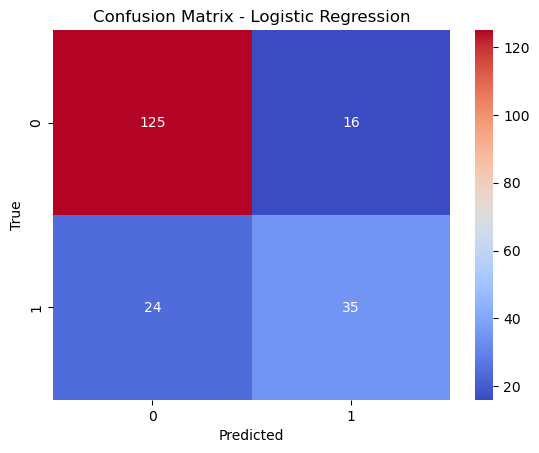

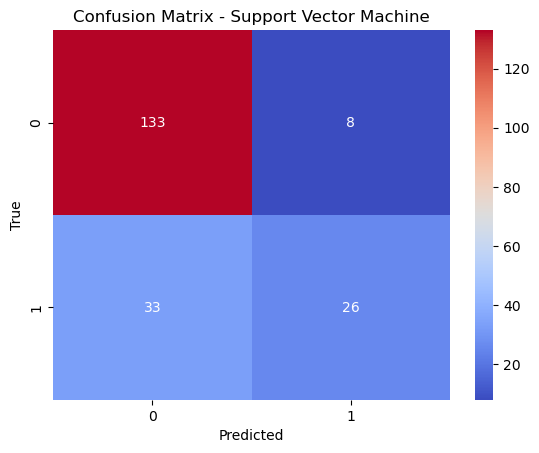

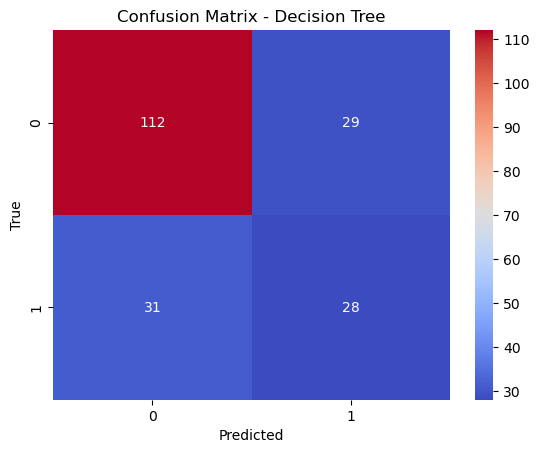

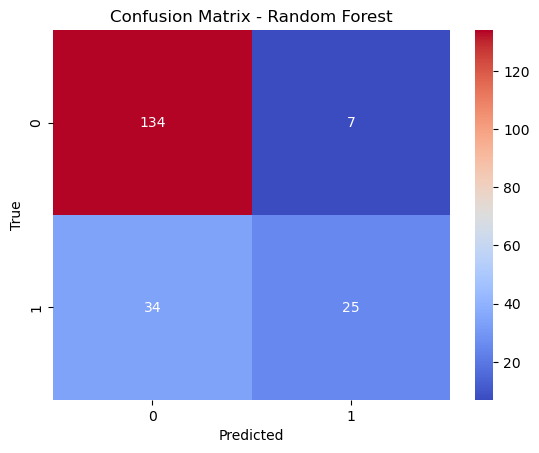

In [15]:
# Confusion matrix for both models
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(lr_model, X_test_scaled, y_test, "Logistic Regression")
plot_confusion_matrix(svm_model, X_test_scaled, y_test, "Support Vector Machine")
plot_confusion_matrix(dt_model, X_test_scaled, y_test, "Decision Tree")
plot_confusion_matrix(rf_model, X_test_scaled, y_test, "Random Forest")





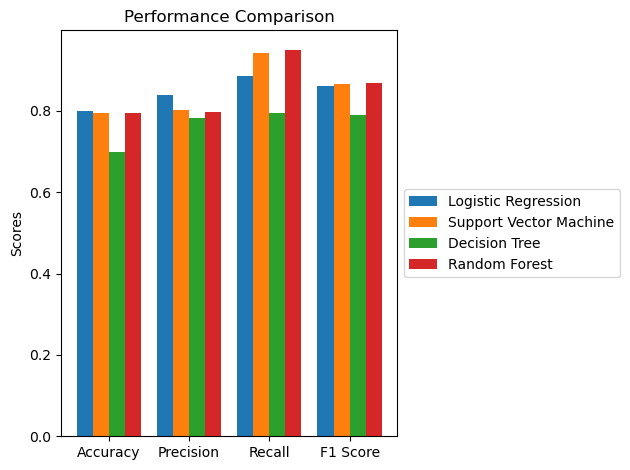

In [16]:
# Performance visualization: Bar plot
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
lr_metrics = [lr_accuracy, lr_precision, lr_recall, lr_f1]
svm_metrics = [svm_accuracy, svm_precision, svm_recall, svm_f1]
dt_metrics = [dt_accuracy, dt_precision, dt_recall, dt_f1]
rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1]

x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - (3 * width)/2, lr_metrics, width, label='Logistic Regression')
rects2 = ax.bar(x - width/2, svm_metrics, width, label='Support Vector Machine')
rects3 = ax.bar(x + width/2, dt_metrics, width, label='Decision Tree')
rects4 = ax.bar(x + (3 * width)/2, rf_metrics, width, label='Random Forest')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Move legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()


### Comments on the confusion matrices

For the first confusion matrix (logistic regression), we have:

- True Positives (TP): 125, meaning that 125 customers were correctly classified as good customers.
- False Positives (FP): 16, meaning that 16 bad customers were incorrectly classified as good customers.
- False Negatives (FN): 24, meaning that 24 good customers were incorrectly classified as bad customers.
- True Negatives (TN): 35, meaning that 35 bad customers were correctly classified as bad customers.

For the second confusion matrix (support vector machine), we have:

- True Positives (TP): 133, meaning that 133 customers were correctly classified as good customers.
- False Positives (FP): 8, meaning that 8 bad customers were incorrectly classified as good customers.
- False Negatives (FN): 33, meaning that 33 good customers were incorrectly classified as bad customers.
- True Negatives (TN): 26, meaning that 26 bad customers were correctly classified as bad customers.

For the third confusion matrix (decision tree), we have:

- True Positives (TP): 112, meaning that 112 customers were correctly classified as good customers.
- False Positives (FP): 29, meaning that 29 bad customers were incorrectly classified as good customers.
- False Negatives (FN): 31, meaning that 31 good customers were incorrectly classified as bad customers.
- True Negatives (TN): 28, meaning that 28 bad customers were correctly classified as bad customers.


For the fourth confusion matrix (random forest), we have:

- True Positives (TP): 134, meaning that 134 customers were correctly classified as good customers.
- False Positives (FP): 7, meaning that 7 bad customers were incorrectly classified as good customers.
- False Negatives (FN): 34, meaning that 34 good customers were incorrectly classified as bad customers.
- True Negatives (TN): 25, meaning that 25 bad customers were correctly classified as bad customers.


## Addressing the class imbalance

The below code is implementing logistic regression and support vector machine models with cost-sensitive learning using class weights. The main idea is to assign different misclassification costs to the majority (good customers) and minority (bad customers) classes to handle class imbalance in the German credit dataset.

Weighted Logistic Regression:
Accuracy:  0.725
Precision:  0.7193877551020408
Recall:  1.0
F1 Score:  0.8367952522255193

Weighted Support Vector Machine:
Accuracy:  0.74
Precision:  0.7379679144385026
Recall:  0.9787234042553191
F1 Score:  0.8414634146341463

Weighted Random Forest:
Accuracy:  0.78
Precision:  0.8050314465408805
Recall:  0.9078014184397163
F1 Score:  0.8533333333333334


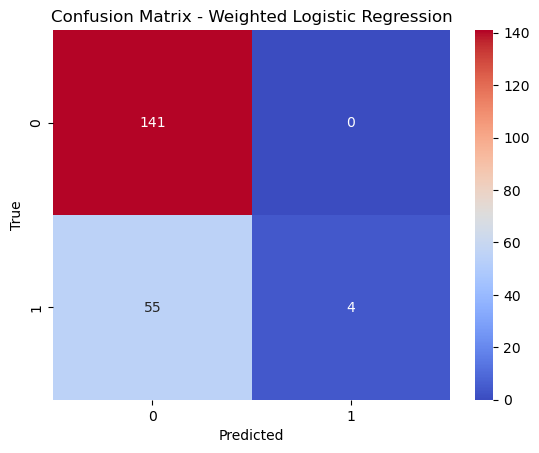

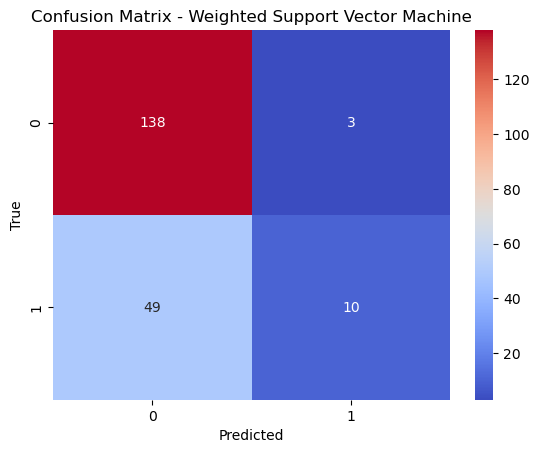

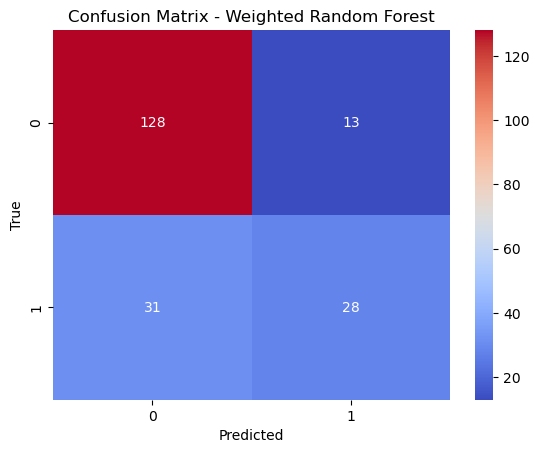

In [17]:
# Define class weights
class_weights = {1: 10, 2: 1}  # Adjust these values according to your needs (10 times more costly to misclassify bad customers)

# Logistic Regression with class weights
lr_model_weighted = LogisticRegression(class_weight=class_weights, random_state=42)
lr_model_weighted.fit(X_train_scaled, y_train)

# Support Vector Machine with class weights
svm_model_weighted = SVC(class_weight=class_weights, random_state=42)
svm_model_weighted.fit(X_train_scaled, y_train)

# Random Forest with class weights
rf_model_weighted = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_model_weighted.fit(X_train_scaled, y_train)

# Evaluate the weighted models
lr_weighted_accuracy, lr_weighted_precision, lr_weighted_recall, lr_weighted_f1 = evaluate_model(lr_model_weighted, X_test_scaled, y_test)
svm_weighted_accuracy, svm_weighted_precision, svm_weighted_recall, svm_weighted_f1 = evaluate_model(svm_model_weighted, X_test_scaled, y_test)
rf_weighted_accuracy, rf_weighted_precision, rf_weighted_recall, rf_weighted_f1 = evaluate_model(rf_model_weighted, X_test_scaled, y_test)

# Print the evaluation results
print("Weighted Logistic Regression:")
print("Accuracy: ", lr_weighted_accuracy)
print("Precision: ", lr_weighted_precision)
print("Recall: ", lr_weighted_recall)
print("F1 Score: ", lr_weighted_f1)

print("\nWeighted Support Vector Machine:")
print("Accuracy: ", svm_weighted_accuracy)
print("Precision: ", svm_weighted_precision)
print("Recall: ", svm_weighted_recall)
print("F1 Score: ", svm_weighted_f1)

print("\nWeighted Random Forest:")
print("Accuracy: ", rf_weighted_accuracy)
print("Precision: ", rf_weighted_precision)
print("Recall: ", rf_weighted_recall)
print("F1 Score: ", rf_weighted_f1)

# Plot confusion matrices for the weighted models
plot_confusion_matrix(lr_model_weighted, X_test_scaled, y_test, "Weighted Logistic Regression")
plot_confusion_matrix(svm_model_weighted, X_test_scaled, y_test, "Weighted Support Vector Machine")
plot_confusion_matrix(rf_model_weighted, X_test_scaled, y_test, "Weighted Random Forest")


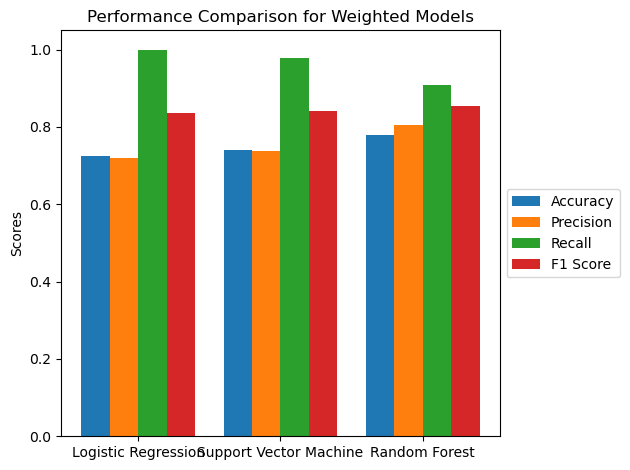

In [18]:
# Plot performance comparison for weighted models
import matplotlib.pyplot as plt
import numpy as np

models = ["Logistic Regression", "Support Vector Machine", "Random Forest"]
accuracy_scores = [lr_weighted_accuracy, svm_weighted_accuracy, rf_weighted_accuracy]
precision_scores = [lr_weighted_precision, svm_weighted_precision, rf_weighted_precision]
recall_scores = [lr_weighted_recall, svm_weighted_recall, rf_weighted_recall]
f1_scores = [lr_weighted_f1, svm_weighted_f1, rf_weighted_f1]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1 Score')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison for Weighted Models')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Move legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

In [22]:
# round results
# Print the evaluation results
print("Weighted Logistic Regression:")
print("Accuracy: ", round(lr_weighted_accuracy, 4))
print("Precision: ", round(lr_weighted_precision, 4))
print("Recall: ", round(lr_weighted_recall, 4))
print("F1 Score: ", round(lr_weighted_f1, 4))

print("\nWeighted Support Vector Machine:")
print("Accuracy: ", round(svm_weighted_accuracy, 4))
print("Precision: ", round(svm_weighted_precision, 4))
print("Recall: ", round(svm_weighted_recall, 4))
print("F1 Score: ", round(svm_weighted_f1, 4))


print("\nWeighted Support Vector Machine:")
print("Accuracy: ", round(rf_weighted_accuracy, 4))
print("Precision: ", round(rf_weighted_precision, 4))
print("Recall: ", round(rf_weighted_recall, 4))
print("F1 Score: ", round(rf_weighted_f1, 4))



Weighted Logistic Regression:
Accuracy:  0.725
Precision:  0.7194
Recall:  1.0
F1 Score:  0.8368

Weighted Support Vector Machine:
Accuracy:  0.74
Precision:  0.738
Recall:  0.9787
F1 Score:  0.8415

Weighted Support Vector Machine:
Accuracy:  0.78
Precision:  0.805
Recall:  0.9078
F1 Score:  0.8533


In [30]:
# Calculate number of errors and total cost for logistic regression model
log_false_positives = 0 # number of false positives
log_false_negatives = 55 # number of false negatives
log_total_errors = log_false_positives + log_false_negatives # total number of errors
log_cost_1 = log_false_positives*1 + log_false_negatives*1 # total cost with false positive cost of 1
log_cost_2 = log_false_positives*2 + log_false_negatives*1 # total cost with false positive cost of 2
log_cost_5 = log_false_positives*5 + log_false_negatives*1 # total cost with false positive cost of 5
log_cost_10 = log_false_positives*10 + log_false_negatives*1 # total cost with false positive cost of 10

print("Logistic Regression model total errors: ", log_total_errors)
print("Logistic Regression model cost with false positive cost of 1: ", log_cost_1)
print("Logistic Regression model cost with false positive cost of 2: ", log_cost_2)
print("Logistic Regression model cost with false positive cost of 5: ", log_cost_5)
print("Logistic Regression model cost with false positive cost of 10: ", log_cost_10)

# Calculate number of errors and total cost for SVM model
svm_false_positives = 3 # number of false positives
svm_false_negatives = 49 # number of false negatives
svm_total_errors = svm_false_positives + svm_false_negatives # total number of errors
svm_cost_1 = svm_false_positives*1 + svm_false_negatives*1 # total cost with false positive cost of 1
svm_cost_2 = svm_false_positives*2 + svm_false_negatives*1 # total cost with false positive cost of 2
svm_cost_5 = svm_false_positives*5 + svm_false_negatives*1 # total cost with false positive cost of 5
svm_cost_10 = svm_false_positives*10 + svm_false_negatives*1 # total cost with false positive cost of 10

print("SVM model total errors: ", svm_total_errors)
print("SVM model cost with false positive cost of 1: ", svm_cost_1)
print("SVM model cost with false positive cost of 2: ", svm_cost_2)
print("SVM model cost with false positive cost of 5: ", svm_cost_5)
print("SVM model cost with false positive cost of 10: ", svm_cost_10)

# Calculate number of errors and total cost for random forest model
rf_false_positives = 13 # number of false positives
rf_false_negatives = 31 # number of false negatives
rf_total_errors = rf_false_positives + rf_false_negatives # total number of errors
rf_cost_1 = rf_false_positives*1 + rf_false_negatives*1 # total cost with false positive cost of 1
rf_cost_2 = rf_false_positives*2 + rf_false_negatives*1 # total cost with false positive cost of 2
rf_cost_5 = rf_false_positives*5 + rf_false_negatives*1 # total cost with false positive cost of 5
rf_cost_10 = rf_false_positives*10 + rf_false_negatives*1 # total cost with false positive cost of 10

print("Random Forest model total errors: ", rf_total_errors)
print("Random Forest model cost with false positive cost of 1: ", rf_cost_1)
print("Random Forest model cost with false positive cost of 2: ", rf_cost_2)
print("Random Forest model cost with false positive cost of 5: ", rf_cost_5)
print("Random Forest model cost with false positive cost of 10: ", rf_cost_10)



Logistic Regression model total errors:  55
Logistic Regression model cost with false positive cost of 1:  55
Logistic Regression model cost with false positive cost of 2:  55
Logistic Regression model cost with false positive cost of 5:  55
Logistic Regression model cost with false positive cost of 10:  55
SVM model total errors:  52
SVM model cost with false positive cost of 1:  52
SVM model cost with false positive cost of 2:  55
SVM model cost with false positive cost of 5:  64
SVM model cost with false positive cost of 10:  79
Random Forest model total errors:  44
Random Forest model cost with false positive cost of 1:  44
Random Forest model cost with false positive cost of 2:  57
Random Forest model cost with false positive cost of 5:  96
Random Forest model cost with false positive cost of 10:  161


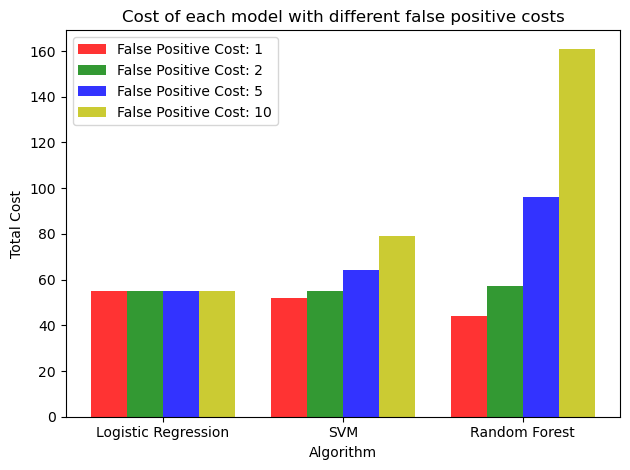

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Data for bar chart
models = ['Logistic Regression', 'SVM', 'Random Forest']
cost_1 = [log_cost_1, svm_cost_1, rf_cost_1]
cost_2 = [log_cost_2, svm_cost_2, rf_cost_2]
cost_5 = [log_cost_5, svm_cost_5, rf_cost_5]
cost_10 = [log_cost_10, svm_cost_10, rf_cost_10]

# Set the width of the bars and their positions
bar_width = 0.2
pos = np.arange(len(models))

# Create subplots
fig, ax = plt.subplots()

# Plot the bars for each scenario and group them by algorithm
rects1 = ax.bar(pos, cost_1, bar_width, alpha=0.8, color='r', label='False Positive Cost: 1')
rects2 = ax.bar(pos + bar_width, cost_2, bar_width, alpha=0.8, color='g', label='False Positive Cost: 2')
rects3 = ax.bar(pos + 2*bar_width, cost_5, bar_width, alpha=0.8, color='b', label='False Positive Cost: 5')
rects4 = ax.bar(pos + 3*bar_width, cost_10, bar_width, alpha=0.8, color='y', label='False Positive Cost: 10')

# Add labels, title, and legend
ax.set_xlabel('Algorithm')
ax.set_ylabel('Total Cost')
ax.set_title('Cost of each model with different false positive costs')
ax.set_xticks(pos + 1.5*bar_width)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


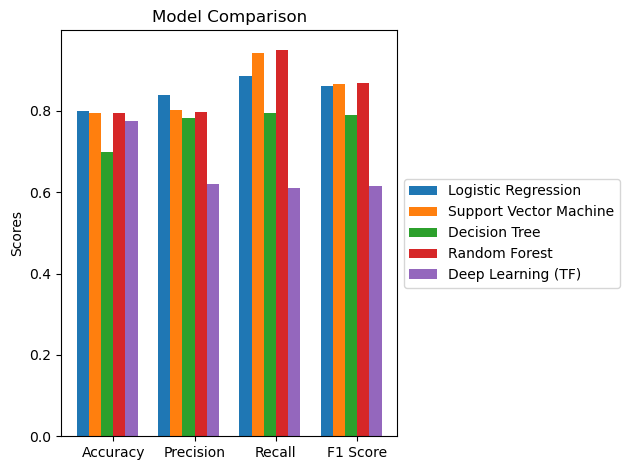

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
lr_metrics = [0.8, 0.8389, 0.8865, 0.8621]
svm_metrics = [0.795, 0.8012, 0.9433, 0.8664]
dt_metrics = [0.7, 0.7832, 0.7943, 0.7887]
rf_metrics = [0.795, 0.7976, 0.9504, 0.8673]
dl_metrics = [0.775, 0.6207, 0.6102, 0.6154]

x = np.arange(len(metrics))  # the label locations
width = 0.15  # the width of the bars

# Create the plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - (2.5 * width), lr_metrics, width, label='Logistic Regression')
rects2 = ax.bar(x - (1.5 * width), svm_metrics, width, label='Support Vector Machine')
rects3 = ax.bar(x - (0.5 * width), dt_metrics, width, label='Decision Tree')
rects4 = ax.bar(x + (0.5 * width), rf_metrics, width, label='Random Forest')
rects5 = ax.bar(x + (1.5 * width), dl_metrics, width, label='Deep Learning (TF)')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)



# Move legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()
